## Diabetes Prediction

In [51]:
from sklearn.datasets import load_diabetes 

dataset = load_diabetes()

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [53]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [54]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [55]:
X = pd.DataFrame(dataset['data'] , columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])

In [56]:
y = pd.DataFrame(dataset['target'] , columns=['target'])

In [57]:
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X, y,  test_size=0.3 , random_state=10 )


<Axes: >

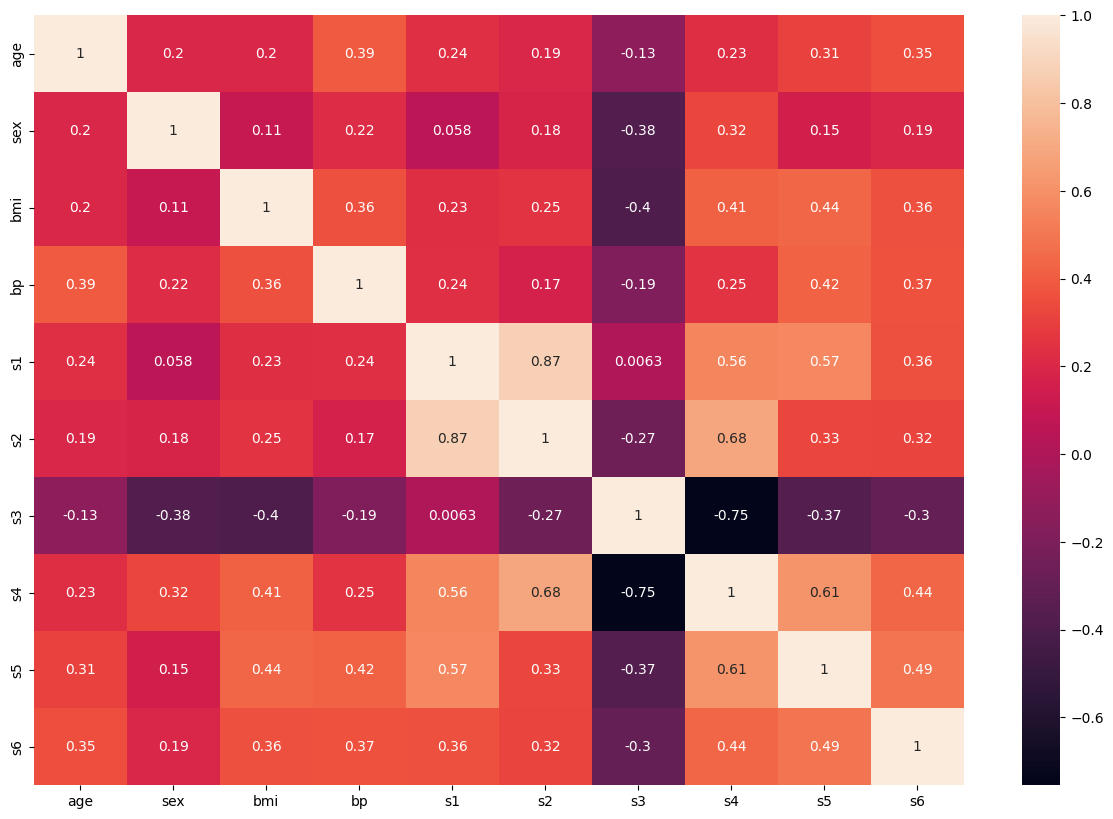

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [59]:
from sklearn.tree import DecisionTreeRegressor 

TreeRegressor = DecisionTreeRegressor(random_state=42)


In [60]:
TreeRegressor.fit(X_train , y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
y_pred = TreeRegressor.predict(X_test)

In [62]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))

-0.19059233303791712
67.10526315789474
7533.6766917293235


### Hyper Parameter Tunning

In [70]:
params = {
    'criterion':['squared_error','friedman_mse','absolute_error' , 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['sqrt','log2']
}

In [71]:
from sklearn.model_selection import GridSearchCV 

grid = GridSearchCV(TreeRegressor , param_grid=params , cv =5 , scoring="neg_mean_squared_error")

In [72]:
grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [73]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [74]:
y_pred = grid.predict(X_test)

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))

0.2713082338599687
57.176554914151296
4610.921825791226


In [78]:
selected_model = DecisionTreeRegressor(criterion='poisson' , max_depth=5 , max_features='sqrt' , splitter='random')

In [80]:
selected_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='sqrt',
                      splitter='random')

[Text(0.48660714285714285, 0.9166666666666666, 'x[7] <= -0.011\npoisson = 18.919\nsamples = 309\nvalue = 152.738'),
 Text(0.25892857142857145, 0.75, 'x[4] <= -0.059\npoisson = 13.576\nsamples = 116\nvalue = 111.241'),
 Text(0.37276785714285715, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[1] <= -0.041\npoisson = 14.13\nsamples = 23\nvalue = 108.609'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[6] <= -0.008\npoisson = 14.768\nsamples = 16\nvalue = 115.312'),
 Text(0.03571428571428571, 0.25, 'x[3] <= -0.006\npoisson = 16.19\nsamples = 5\nvalue = 139.2'),
 Text(0.017857142857142856, 0.08333333333333333, 'poisson = 12.428\nsamples = 3\nvalue = 155.333'),
 Text(0.05357142857142857, 0.08333333333333333, 'poisson = 18.244\nsamples = 2\nvalue = 115.0'),
 Text(0.10714285714285714, 0.25, 'x[8] <= -0.044\npoisson = 12.54\nsamples = 11\nvalue = 104.455'),
 Text(0.08928571428571429, 0.08333333333333333, 'poisson = 9.805\nsamples = 7\nvalue = 79.857'),
 Tex

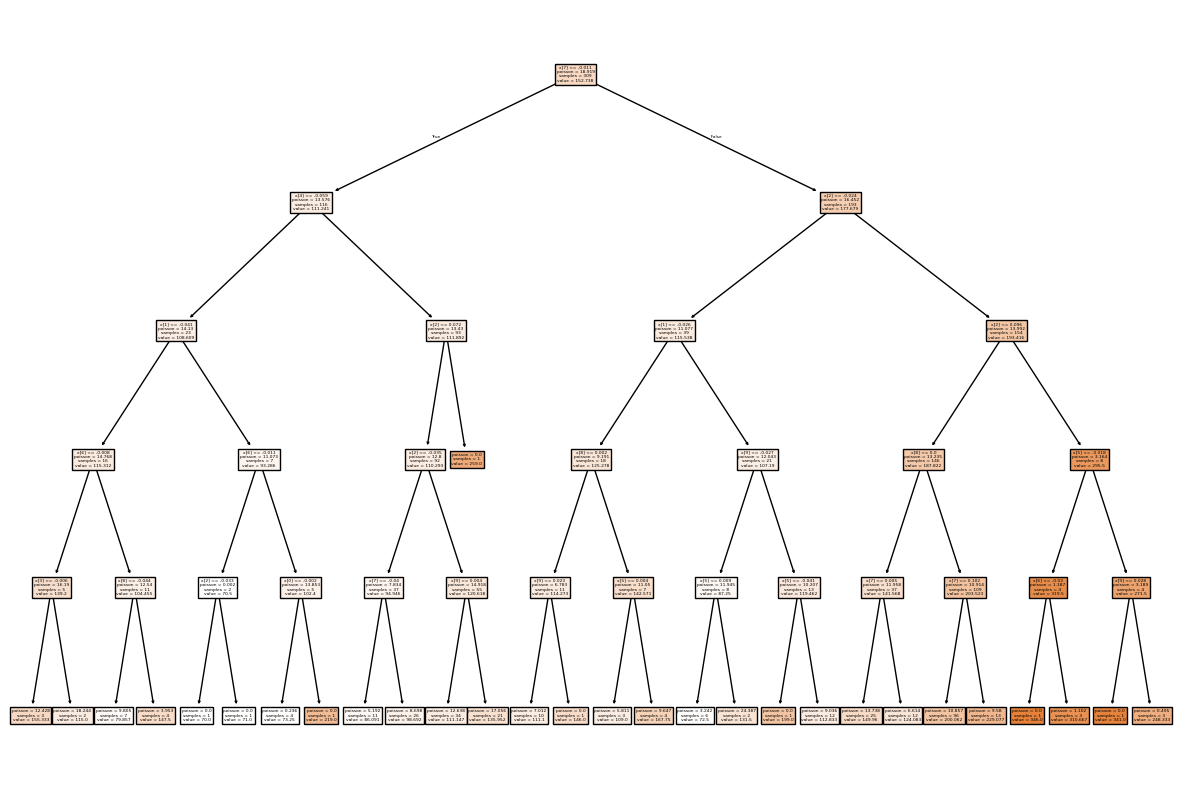

In [82]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selected_model,filled=True)